## Observations and Insights 

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_table = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
merged_table.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [26]:
# Checking the number of mice.
#merged_table.index
#merged_table.count("Mouse ID")
#merged_table['Mouse ID'].value_counts()

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892],
           dtype='int64', length=1893)

In [12]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = merged_table.loc[merged_table.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

print(duplicate_mouse)


['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [30]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#merged_table[merged_table."Mouse ID" != "g989"]
final_df = merged_table[merged_table['Mouse ID'] != 'g989']
final_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [32]:
# Checking the number of mice in the clean DataFrame.
final_df['Mouse ID'].value_counts()

w422    10
c757    10
p136    10
o795    10
x402    10
        ..
h428     1
d133     1
n482     1
b447     1
t573     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [34]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

mean = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_deviation = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end.

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, 
                           "Standard Deviation": standard_deviation, 
                          "SEM": sem})
print(summary_df)


                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

Text(0, 0.5, 'Mice')

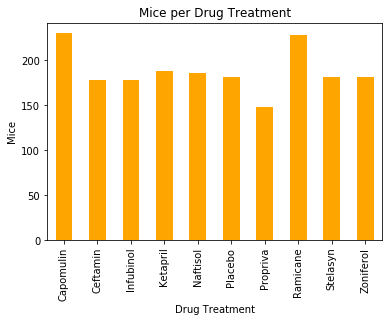

In [45]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
drug_mice = final_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
bar_chart = drug_mice.plot(kind="bar", color = "orange")
plt.title("Mice per Drug Treatment")
plt.xlabel("Drug Treatment")
plt.ylabel("Mice")


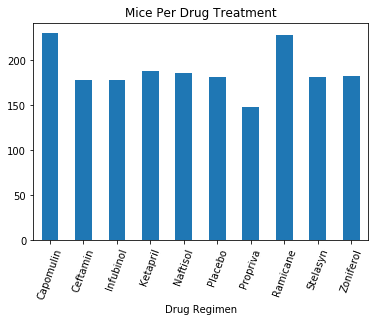

In [49]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drug_mice.plot.bar(x="Drug Treatment", y="Mice", rot=70, title="Mice Per Drug Treatment")
#plot.show(block=True)

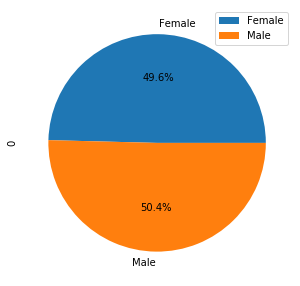

In [74]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = final_df.groupby(["Mouse ID","Sex"])
gender_df = pd.DataFrame(gender.size())
#gender_df.head()
mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.head()
mouse_gender_percent = (100*(mouse_gender/mouse_gender.sum()))
mouse_gender_percent
plot = mouse_gender_percent.plot.pie(subplots = True, figsize=(5, 5), autopct="%1.1f%%")
#print(plot)


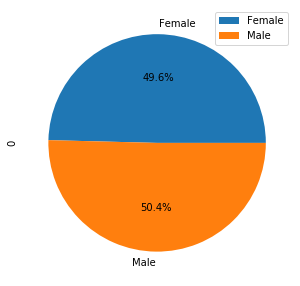

In [73]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

pie_chart = mouse_gender_percent.plot.pie(subplots=True, figsize=(5,5), autopct="%1.1f%%")

## Quartiles, Outliers and Boxplots

In [78]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

tumor_volume = final_df[final_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
#tumor_volume
# Start by getting the last (greatest) timepoint for each mouse

tumor_volume = tumor_volume.sort_values(["Timepoint"], ascending=False)
tumor_volume
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1872,z581,Infubinol,Female,24,25,45,62.754451,3
800,e476,Infubinol,Male,23,26,45,62.435404,1
154,c758,Ramicane,Male,9,17,45,33.397653,1
440,i557,Capomulin,Female,1,24,45,47.685963,1
144,m957,Capomulin,Female,3,19,45,33.329098,1
...,...,...,...,...,...,...,...,...
75,z578,Ramicane,Male,11,16,0,45.000000,0
1113,l490,Ceftamin,Male,24,26,0,45.000000,0
1120,l558,Ceftamin,Female,13,30,0,45.000000,0
1123,l661,Ceftamin,Male,18,26,0,45.000000,0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
